In [1]:

import numpy as np
import pandas as pd
from s2cloudless import S2PixelCloudDetector
import rasterio as rio
from pathlib import Path
from PIL import Image

C:\Users\oriol.alas\VENVS\mlvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def get_detect_cloud_bands(img):
    bands = [img.read(b) / 10000 for b in img.indexes]
    bands = np.stack(bands)
    return bands.transpose(1,2,0)

def main(input, output):
    cloud_detector = S2PixelCloudDetector(threshold=0.7, average_over=4, dilation_size=2, all_bands=True)
    path_input = Path(input)
    for split in ["train.pkl", "val.pkl", "test.pkl"]:
        df = pd.read_pickle(path_input / split)
        cloud_mask_paths = []
        for i, row in df.iterrows():
            scene, season, roi, patch = i
            img = rio.open(row['cloudly_img_path'])
            img = get_detect_cloud_bands(img)
            mask = cloud_detector.get_cloud_masks(img[np.newaxis, ...])[0]
            mask_path = "{}_{}_{}_{}.tif".format(roi,  scene, season, patch)
            img = Image.fromarray(mask)
            img.save("{}/{}.tiff".format(output, mask_path))
            cloud_mask_paths.append(mask_path)
        df["cloud_mask_path"] = cloud_mask_paths
        df.to_pickle(path_input / split)

main(r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\data\input\augmented", r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\data\input\augmented")


cloudly_img_path  \
scene season roi      patch                                                      
106   autumn ROIs1158 0      america/ROIs1158/106/S2/0/s2_ROIs1158_106_ImgN...   
                      1      america/ROIs1158/106/S2/0/s2_ROIs1158_106_ImgN...   
                      2      america/ROIs1158/106/S2/0/s2_ROIs1158_106_ImgN...   
                      3      america/ROIs1158/106/S2/0/s2_ROIs1158_106_ImgN...   
                      4      america/ROIs1158/106/S2/0/s2_ROIs1158_106_ImgN...   
...                                                                        ...   
94    winter ROIs2017 613    s2_cloudy/ROIs2017_winter_s2_cloudy/s2_cloudy_...   
                      156    s2_cloudy/ROIs2017_winter_s2_cloudy/s2_cloudy_...   
                      795    s2_cloudy/ROIs2017_winter_s2_cloudy/s2_cloudy_...   
                      506    s2_cloudy/ROIs2017_winter_s2_cloudy/s2_cloudy_...   
                      122    s2_cloudy/ROIs2017_winter_s2_cloudy/s2_cloudy_...   

                                                                  sar_img_path  \
scene season roi      patch                                                      
106   autumn ROIs1158 0      america/ROIs1158/106/S1/0/s1_ROIs1158_106_ImgN...   
                      1      america/ROIs1158/106/S1/0/s1_ROIs1158_106_ImgN...   
                      2      america/ROIs1158/106/S1/0/s1_ROIs1158_106_ImgN...   
                      3      america/ROIs1158/106/S1/0/s1_ROIs1158_106_ImgN...   
                      4      america/ROIs1158/106/S1/0/s1_ROIs1158_106_ImgN...   
...                                                                        ...   
94    winter ROIs2017 613    s1/ROIs2017_winter_s1/s1_94/ROIs2017_winter_s1...   
                      156    s1/ROIs2017_winter_s1/s1_94/ROIs2017_winter_s1...   
                      795    s1/ROIs2017_winter_s1/s1_94/ROIs2017_winter_s1...   
                      506    s1/ROIs2017_winter_s1/s1_94/ROIs2017_winter_s1...   
                      122    s1/ROIs2017_winter_s1/s1_94/ROIs2017_winter_s1...   

                                                            cloudless_img_path  \
scene season roi      patch                                                      
106   autumn ROIs1158 0      america/ROIs1158/106/S2/1/s2_ROIs1158_106_ImgN...   
                      1      america/ROIs1158/106/S2/1/s2_ROIs1158_106_ImgN...   
                      2      america/ROIs1158/106/S2/1/s2_ROIs1158_106_ImgN...   
                      3      america/ROIs1158/106/S2/1/s2_ROIs1158_106_ImgN...   
                      4      america/ROIs1158/106/S2/1/s2_ROIs1158_106_ImgN...   
...                                                                        ...   
94    winter ROIs2017 613    s2/ROIs2017_winter_s2/s2_94/ROIs2017_winter_s2...   
                      156    s2/ROIs2017_winter_s2/s2_94/ROIs2017_winter_s2...   
                      795    s2/ROIs2017_winter_s2/s2_94/ROIs2017_winter_s2...   
                      506    s2/ROIs2017_winter_s2/s2_94/ROIs2017_winter_s2...   
                      122    s2/ROIs2017_winter_s2/s2_94/ROIs2017_winter_s2...   

                            continent  
scene season roi      patch            
106   autumn ROIs1158 0       america  
                      1       america  
                      2       america  
                      3       america  
                      4       america  
...                               ...  
94    winter ROIs2017 613        None  
                      156        None  
                      795        None  
                      506        None  
                      122        None  

[131710 rows x 4 columns]

RasterioIOError: america/ROIs1158/106/S2/0/s2_ROIs1158_106_ImgNo_0_2018-01-04_patch_0.tif: No such file or directory

In [14]:
df = pd.read_pickle("data/input/mask/augmented/test.pkl")

In [ ]:
df

In [17]:
import random

samples_idx = random.sample(list(range(7899)), 20)
df.iloc[samples_idx]

sar_img_path  \
scene season roi      patch                                                      
73    summer ROIs1868 198    s1/ROIs1868_summer_s1/s1_73/ROIs1868_summer_s1...   
119   summer ROIs1868 69     s1/ROIs1868_summer_s1/s1_119/ROIs1868_summer_s...   
106   spring ROIs1158 669    s1/ROIs1158_spring_s1/s1_106/ROIs1158_spring_s...   
63    winter ROIs2017 605    s1/ROIs2017_winter_s1/s1_63/ROIs2017_winter_s1...   
31    spring ROIs1158 528    s1/ROIs1158_spring_s1/s1_31/ROIs1158_spring_s1...   
139   fall   ROIs1970 302    s1/ROIs1970_fall_s1/s1_139/ROIs1970_fall_s1_13...   
140   spring ROIs1158 618    s1/ROIs1158_spring_s1/s1_140/ROIs1158_spring_s...   
119   summer ROIs1868 506    s1/ROIs1868_summer_s1/s1_119/ROIs1868_summer_s...   
106   spring ROIs1158 230    s1/ROIs1158_spring_s1/s1_106/ROIs1158_spring_s...   
44    spring ROIs1158 31     s1/ROIs1158_spring_s1/s1_44/ROIs1158_spring_s1...   
108   winter ROIs2017 365    s1/ROIs2017_winter_s1/s1_108/ROIs2017_winter_s...   
119   summer ROIs1868 366    s1/ROIs1868_summer_s1/s1_119/ROIs1868_summer_s...   
106   spring ROIs1158 64     s1/ROIs1158_spring_s1/s1_106/ROIs1158_spring_s...   
123   spring ROIs1158 129    s1/ROIs1158_spring_s1/s1_123/ROIs1158_spring_s...   
73    summer ROIs1868 37     s1/ROIs1868_summer_s1/s1_73/ROIs1868_summer_s1...   
119   summer ROIs1868 97     s1/ROIs1868_summer_s1/s1_119/ROIs1868_summer_s...   
63    winter ROIs2017 450    s1/ROIs2017_winter_s1/s1_63/ROIs2017_winter_s1...   
73    summer ROIs1868 645    s1/ROIs1868_summer_s1/s1_73/ROIs1868_summer_s1...   
108   winter ROIs2017 664    s1/ROIs2017_winter_s1/s1_108/ROIs2017_winter_s...   
119   summer ROIs1868 66     s1/ROIs1868_summer_s1/s1_119/ROIs1868_summer_s...   

                                                            cloudless_img_path  \
scene season roi      patch                                                      
73    summer ROIs1868 198    s2/ROIs1868_summer_s2/s2_73/ROIs1868_summer_s2...   
119   summer ROIs1868 69     s2/ROIs1868_summer_s2/s2_119/ROIs1868_summer_s...   
106   spring ROIs1158 669    s2/ROIs1158_spring_s2/s2_106/ROIs1158_spring_s...   
63    winter ROIs2017 605    s2/ROIs2017_winter_s2/s2_63/ROIs2017_winter_s2...   
31    spring ROIs1158 528    s2/ROIs1158_spring_s2/s2_31/ROIs1158_spring_s2...   
139   fall   ROIs1970 302    s2/ROIs1970_fall_s2/s2_139/ROIs1970_fall_s2_13...   
140   spring ROIs1158 618    s2/ROIs1158_spring_s2/s2_140/ROIs1158_spring_s...   
119   summer ROIs1868 506    s2/ROIs1868_summer_s2/s2_119/ROIs1868_summer_s...   
106   spring ROIs1158 230    s2/ROIs1158_spring_s2/s2_106/ROIs1158_spring_s...   
44    spring ROIs1158 31     s2/ROIs1158_spring_s2/s2_44/ROIs1158_spring_s2...   
108   winter ROIs2017 365    s2/ROIs2017_winter_s2/s2_108/ROIs2017_winter_s...   
119   summer ROIs1868 366    s2/ROIs1868_summer_s2/s2_119/ROIs1868_summer_s...   
106   spring ROIs1158 64     s2/ROIs1158_spring_s2/s2_106/ROIs1158_spring_s...   
123   spring ROIs1158 129    s2/ROIs1158_spring_s2/s2_123/ROIs1158_spring_s...   
73    summer ROIs1868 37     s2/ROIs1868_summer_s2/s2_73/ROIs1868_summer_s2...   
119   summer ROIs1868 97     s2/ROIs1868_summer_s2/s2_119/ROIs1868_summer_s...   
63    winter ROIs2017 450    s2/ROIs2017_winter_s2/s2_63/ROIs2017_winter_s2...   
73    summer ROIs1868 645    s2/ROIs1868_summer_s2/s2_73/ROIs1868_summer_s2...   
108   winter ROIs2017 664    s2/ROIs2017_winter_s2/s2_108/ROIs2017_winter_s...   
119   summer ROIs1868 66     s2/ROIs1868_summer_s2/s2_119/ROIs1868_summer_s...   

                                                              cloudly_img_path  \
scene season roi      patch                                                      
73    summer ROIs1868 198    s2_cloudy/ROIs1868_summer_s2_cloudy/s2_cloudy_...   
119   summer ROIs1868 69     s2_cloudy/ROIs1868_summer_s2_cloudy/s2_cloudy_...   
106   spring ROIs1158 669    s2_cloudy/ROIs1158_spring_s2_cloudy/s2_cloudy_...   
63    winter ROIs2017 605    s2_cloudy/ROIs201

In [19]:
samples_idx

[5278,
 4294,
 316,
 7264,
 2729,
 6317,
 2266,
 4065,
 746,
 3968,
 6780,
 4287,
 581,
 1302,
 5349,
 4433,
 7657,
 5254,
 6553,
 4438]

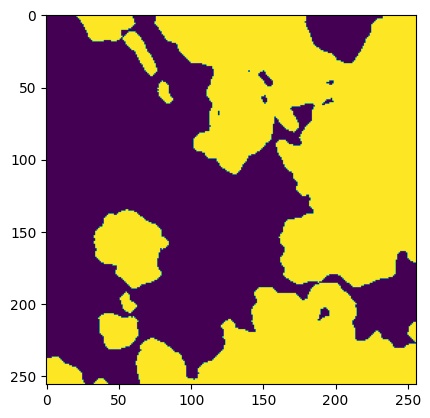

In [9]:
from PIL import Image
from matplotlib import pyplot as plt
plt.imshow(np.array(Image.open(r"C:\Users\oriol.alas\PROJECTS\LACLASSE\eda\notebooks\imgs\mask\ROIs2017_63_winter_307.tif.tiff")))

In [97]:
def scaled(x):
    min_val, max_val = np.percentile(x, (2, 98))

    # Scale the pixel values to the range of 0-255
    return np.interp(x, (min_val, max_val), (0.01, 255)).astype(np.uint8)

def sigmoid(x):
    print(x.max(), x.min())
    return 255 / (1 + np.exp(-2 * (scaled(x) / 255 - 0.5)))

def get_detect_cloud_bands(img):
    bands = [sigmoid(img.read(b)) for b in img.indexes]
    bands = np.stack(bands)
    return bands.transpose(1,2,0).astype(np.uint8)

def get_tci(img):
    r = scaled(img.read(4))
    g = scaled(img.read(3))
    b = scaled(img.read(2))
    rgb = np.stack([r, g, b])
    rgb = (rgb.transpose(1, 2, 0)).astype(np.uint8)
    return rgb


def get_tci_sar(img):
    r = scaled(img.read(4+2))
    g = scaled(img.read(3+2))
    b = scaled(img.read(2+2))
    rgb = np.stack([r, g, b])
    rgb = (rgb.transpose(1, 2, 0)).astype(np.uint8)
    return rgb

In [72]:
from matplotlib import pyplot as plt

In [73]:
import rasterio

array = np.random.random((13, 256, 256)) * 255
array = array.astype(np.uint16)
with rasterio.open("filename.tif", 'w', driver='GTiff', 
                    height=array.shape[1], 
                    width=array.shape[2], 
                    count=array.shape[0], 
                    dtype=str(array.dtype)) as dst:
    for idx in range(array.shape[0]):
        dst.write(array[idx], idx + 1)


C:\Users\oriol.alas\VENVS\mlvenv\Lib\site-packages\rasterio\__init__.py:329: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


In [100]:
from skimage.metrics import structural_similarity as ssim, mean_squared_error as mse

In [178]:
with rasterio.open("5278_output.tif") as src:
    tci = src.read()
    imgout = get_tci(src)
with rasterio.open("5278_input.tif") as src:
    tci_in = src.read()
with rasterio.open("5278_target.tif") as src:
    tci_targ = src.read()
    img = get_tci(src)

C:\Users\oriol.alas\VENVS\mlvenv\Lib\site-packages\rasterio\__init__.py:319: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


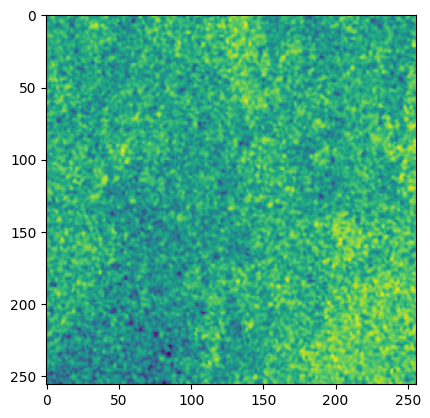

In [179]:
plt.imshow(tci_in[1])

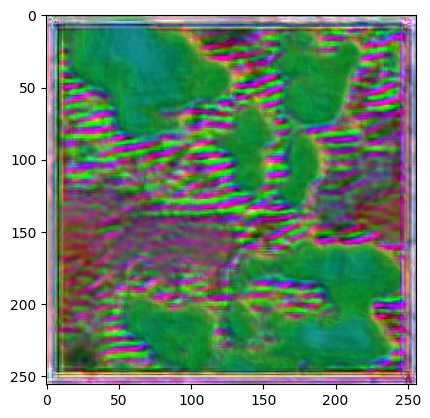

In [180]:
plt.imshow(imgout)

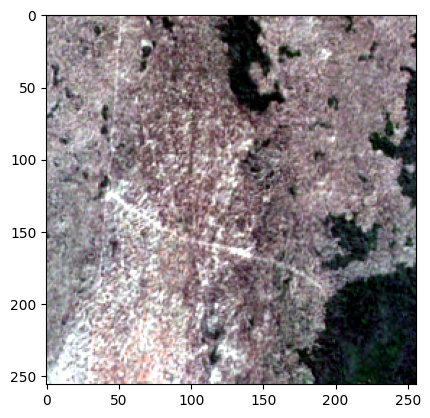

In [184]:
plt.imshow(img)

In [151]:
ssim(imgout, img, multichannel=True, data_range=255, channel_axis=2)

0.049395170819755786

0.053699656821282804
6963.801788330078
0.041019752560154006
6918.62158203125
0.029291719035419744
6290.257431030273
0.07787404086369362
5844.294479370117
0.07238611550676509
5885.301986694336
0.04178939707179445
6983.590026855469
0.04797430302964287
6883.083709716797
0.050440639474194825
6627.530181884766
0.054097260251606695
6873.585311889648
0.038072958462580984
7173.363510131836
0.09277322329757122
7625.800384521484
0.10033702915313619
5460.957336425781
0.10723065222527903
5533.956329345703


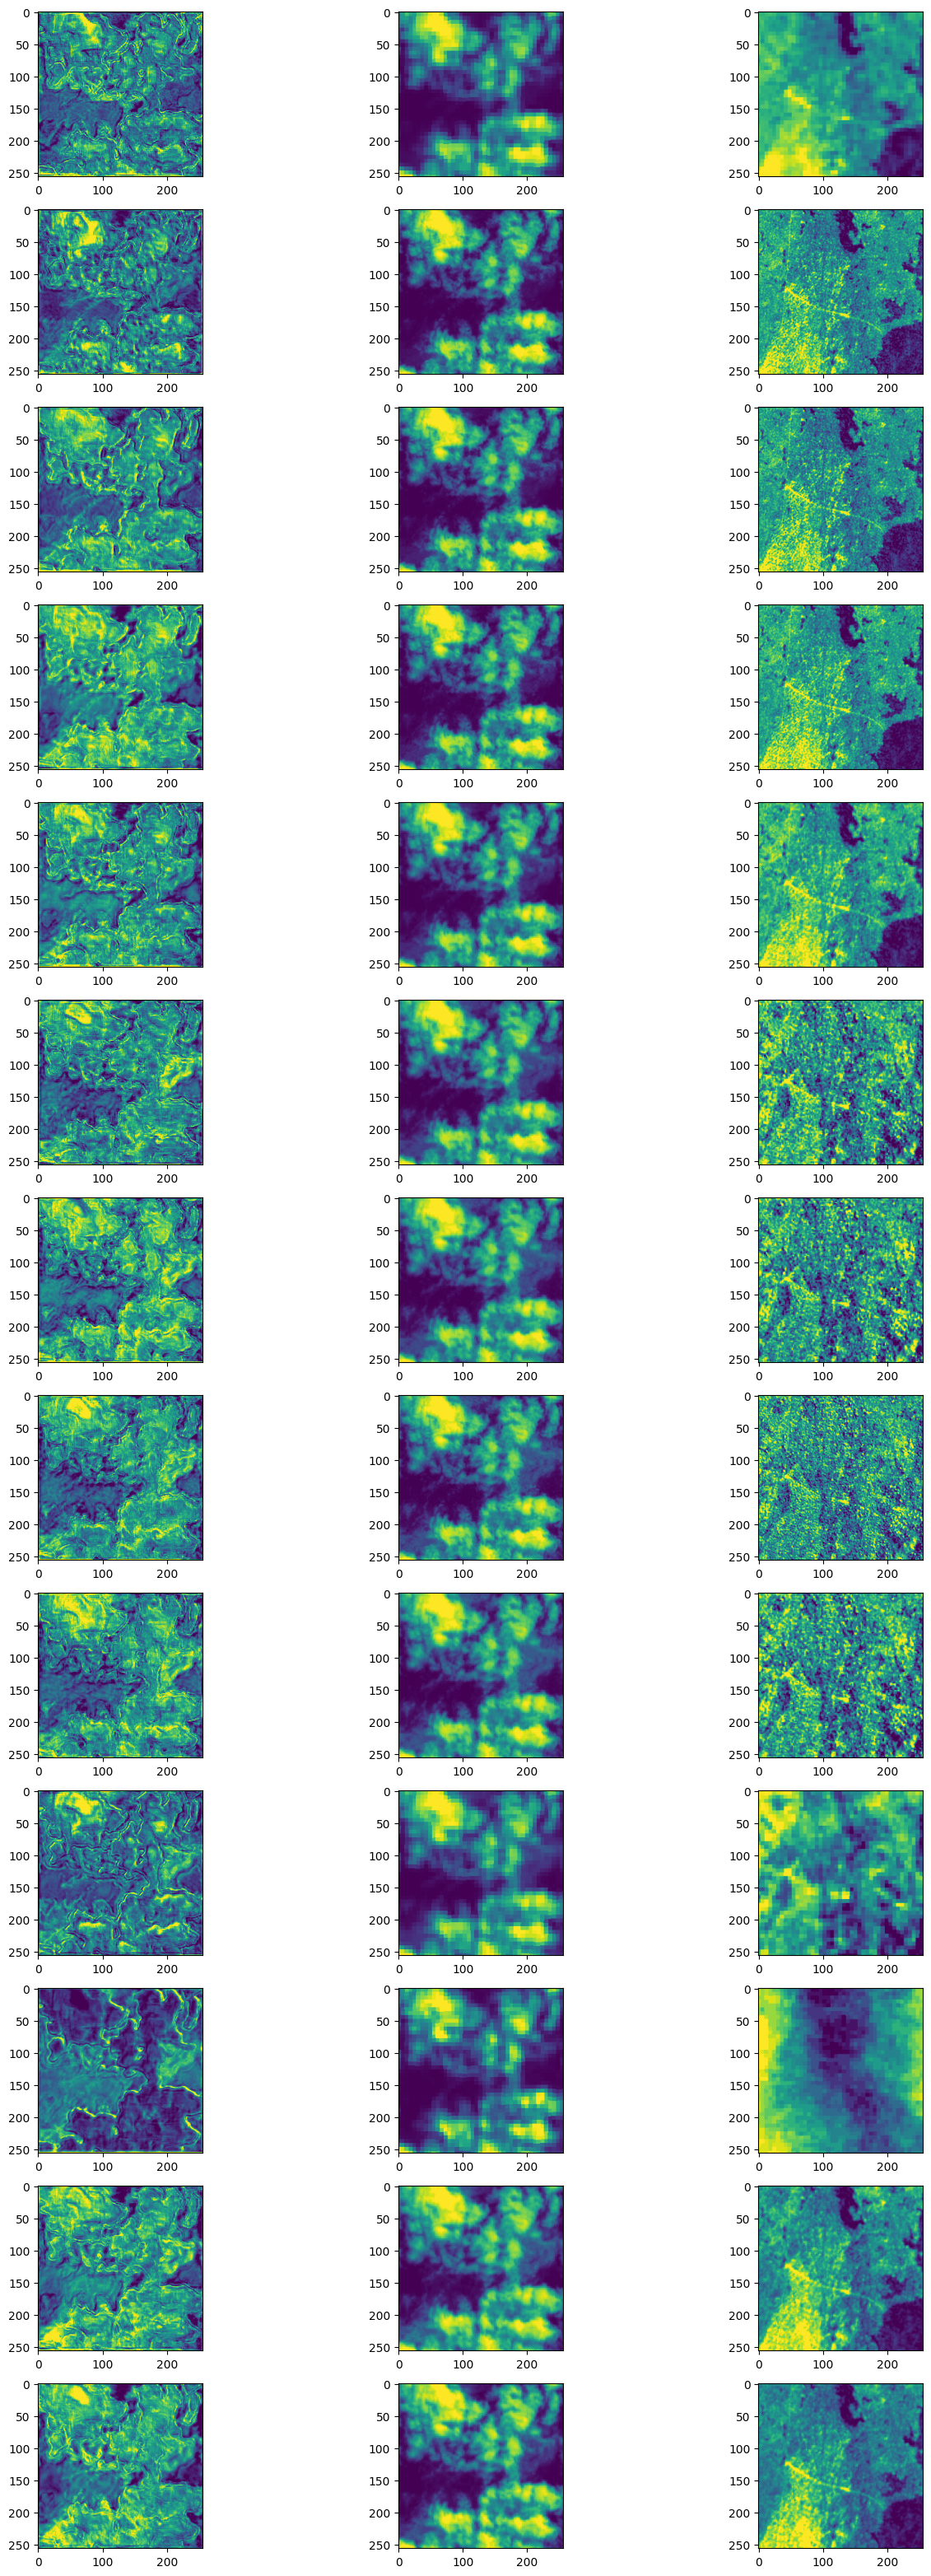

In [123]:
fig, axs = plt.subplots(13, 3, figsize=(16, 40))
for i, ax in enumerate(axs):
    ax[0].imshow(scaled(tci[i]), vmin=0, vmax=255)
    ax[1].imshow(scaled(tci_in[i+2]), vmin=0, vmax=255)
    ax[2].imshow(scaled(tci_targ[i]), vmin=0, vmax=255)
    print(ssim(scaled(tci[i]), scaled(tci_targ[i]), data_range=255))
    print(mse(scaled(tci[i]), scaled(tci_targ[i])))

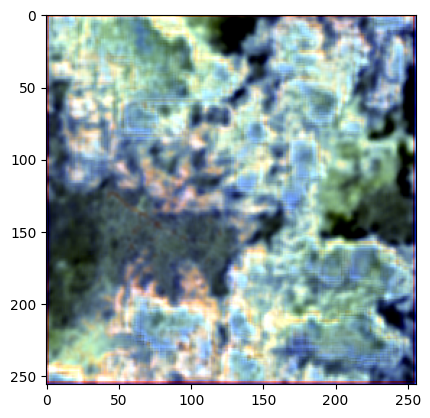

In [76]:
plt.imshow(tci, vmin=0, vmax=256)

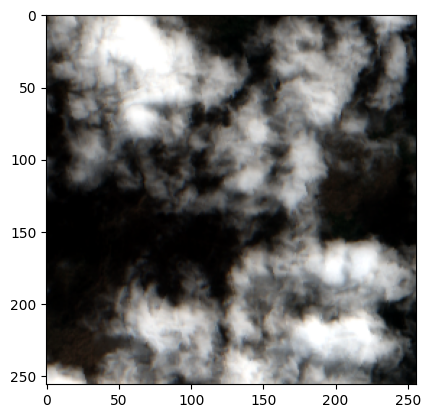

In [77]:
plt.imshow(tci_in, vmin=0, vmax=256)

In [37]:
tci

array([[-0.00193186, -0.00204229, -0.00187667, ..., -0.002013  ,
        -0.00180194, -0.00163655],
       [-0.00175819, -0.00179268, -0.00168092, ..., -0.00196654,
        -0.00175562, -0.00161769],
       [-0.00195325, -0.00188834, -0.00166898, ..., -0.00181223,
        -0.00164185, -0.00156638],
       ...,
       [-0.00231216, -0.00231092, -0.00212189, ..., -0.00162345,
        -0.00157661, -0.00155276],
       [-0.00215475, -0.00207217, -0.00199467, ..., -0.00141646,
        -0.00144045, -0.00164234],
       [-0.00226339, -0.00216647, -0.0020536 , ..., -0.00143894,
        -0.0014919 , -0.00177149]], dtype=float32)

In [38]:
Image.fromarray(tci)

ValueError: Could not save to PNG for display

<PIL.Image.Image image mode=F size=256x256>